## ML LAB ASSIGNMENT 

### SUPRATIM NAG -- CSE-AIML/22/057 -- GROUP-B

### Q-6:Write a python code to implement K-Means clustering algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from collections import Counter
from matplotlib.colors import ListedColormap

In [3]:
meddata = pd.read_csv(r"C:\Users\SUPRATIM NAG\OneDrive\Documents\ML\Personal_Datasets\Dataset.csv")
meddata.head(1)

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Treatment Plan,Recovery Status,Medication Type,Follow-up Requirement
0,101,65,130,250,72,28.0,Hypertension with high cholesterol.,"Medication: Lisinopril (blood pressure), Stati...",Active Recovery,"Lisinopril, Statins.",Quarterly.


In [20]:
data=meddata[["Age","Blood Pressure","Cholesterol Levels","Heart Rate"]]
data.head(1)

,Age,Blood Pressure,Cholesterol Levels,Heart Rate
0,65,130,250,72


In [26]:
S = MinMaxScaler()
data = S.fit_transform(data)
data

array([[0.8       , 0.53846154, 0.72222222, 0.24      ],
       [0.34      , 0.23076923, 0.16666667, 0.32      ],
       [0.66      , 0.69230769, 0.44444444, 0.4       ],
       [0.92      , 1.        , 0.55555556, 0.56      ],
       [0.2       , 0.38461538, 0.33333333, 0.28      ],
       [0.7       , 0.61538462, 0.61111111, 0.36      ],
       [0.4       , 0.15384615, 0.        , 0.3       ],
       [0.4       , 0.38461538, 0.44444444, 0.2       ],
       [0.2       , 0.69230769, 0.33333333, 0.5       ],
       [0.5       , 0.61538462, 0.16666667, 0.4       ],
       [0.3       , 0.46153846, 0.22222222, 0.3       ],
       [0.6       , 0.53846154, 0.27777778, 0.4       ],
       [0.7       , 0.61538462, 0.33333333, 0.3       ],
       [0.4       , 0.30769231, 0.55555556, 0.2       ],
       [0.5       , 0.53846154, 0.36111111, 0.4       ],
       [0.2       , 0.46153846, 0.5       , 0.5       ],
       [0.8       , 0.69230769, 0.44444444, 0.3       ],
       [0.9       , 0.53846154,

In [27]:
data = pd.DataFrame(data, columns=['A','B','C','D'])
data

,A,B,C,D
0,0.80,0.538462,0.722222,0.24
1,0.34,0.230769,0.166667,0.32
2,0.66,0.692308,0.444444,0.40
3,0.92,1.000000,0.555556,0.56
4,0.20,0.384615,0.333333,0.28
...,...,...,...,...
95,0.40,0.692308,0.777778,0.50
96,0.90,0.461538,0.444444,0.20
97,0.60,0.307692,0.333333,0.40
98,0.10,0.384615,0.388889,0.30


In [28]:
model = KMeans(n_clusters=2)
model.fit(data)

KMeans(n_clusters=2)

In [29]:
y = model.fit_predict(data)
y

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [30]:
data['cluster'] = y
data

,A,B,C,D,cluster
0,0.80,0.538462,0.722222,0.24,1
1,0.34,0.230769,0.166667,0.32,0
2,0.66,0.692308,0.444444,0.40,1
3,0.92,1.000000,0.555556,0.56,1
4,0.20,0.384615,0.333333,0.28,0
...,...,...,...,...,...
95,0.40,0.692308,0.777778,0.50,1
96,0.90,0.461538,0.444444,0.20,1
97,0.60,0.307692,0.333333,0.40,0
98,0.10,0.384615,0.388889,0.30,0


In [31]:
cent=model.cluster_centers_
cent

array([[0.29927273, 0.32167832, 0.31868687, 0.31345455],
       [0.71022222, 0.67008547, 0.5962963 , 0.47822222]])

<Axes: xlabel='A', ylabel='B'>

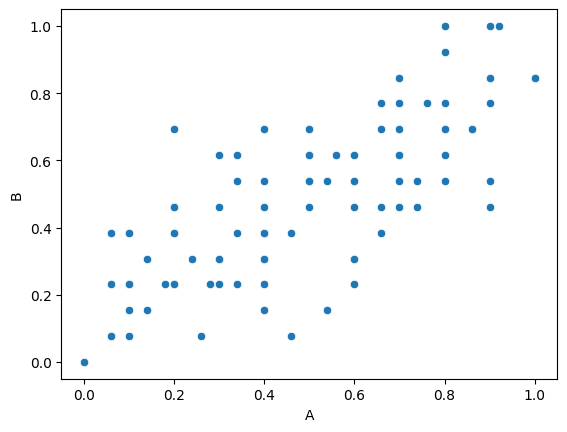

In [32]:
Counter(model.labels_)
Counter({1 : 50, 0 : 100})
sns.scatterplot(data=data, x='A', y='B')

<Axes: xlabel='A', ylabel='B'>

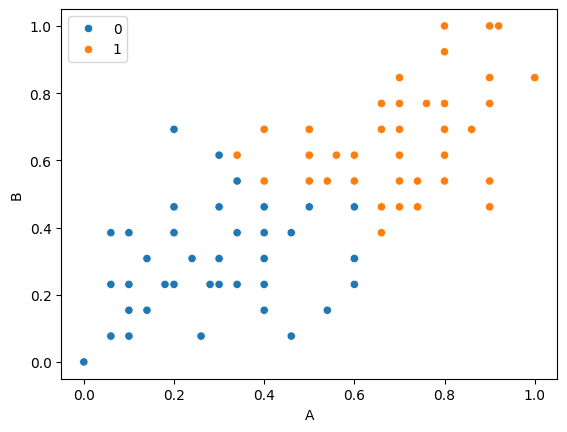

In [33]:
sns.scatterplot(data=data, x='A', y='B', hue=model.labels_)

In [34]:
K_rng=range(1,11)
Sse=[ ]
for K in K_rng:
	km = KMeans(n_clusters=K)
	km.fit(data[['A','B']])
	Sse.append(km.inertia_)
	

Sse

[12.102806414201183,
 4.608999057910252,
 3.0668059146735622,
 2.4026880889391014,
 1.9262136795967577,
 1.7936686691287602,
 1.2623216229923928,
 1.2284888105057339,
 0.9830178004638364,
 0.9371554720493188]